#### Labb 2

- Jag har kommer nog troligen jobba vidare på denna under Labb2_2 och den komer troligen ha uppdateringar efter inlämnings stopp.
- Fastnade på några ställen, vad gäller variabel rensning, hadde ju missat endel funktioner i CSV bla så skall försöka förbättra lite utanför labben och eventulet lösa extra uppgifterna men i alla fall snygga till detta om jag kan.
- Denna skall inte ha några uppdteringar efter 23:59 23-09-22

Test Point Pika, Point x:25.0 y:32.0
Test Point Pika, Point x:24.2 y:31.5
Test Point Pika, Point x:22.0 y:34.0
Test Point Picha, Point x:20.5 y:34.0

User Point is Picha, Distans Picha total 10 points check: 20.052489382653516 le


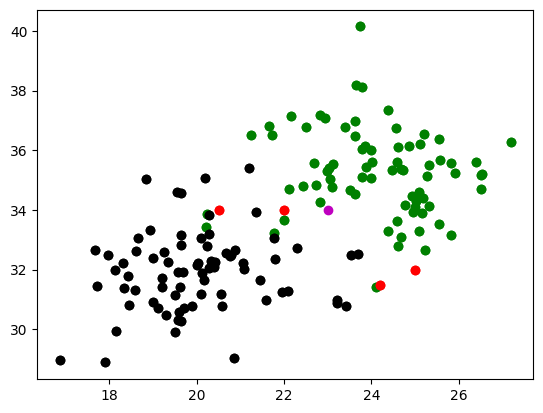

In [1]:
import csv
import math 
import numpy as np
import matplotlib.pyplot as plt


                #---------:Pokemon Data to define Pokemon Pichu and Pikachu:---------#
# Read Pokemon Data from .txt file
with open("C:\\Users\\waan2\\Documents\\Python-Anders-Wall\\Labs\\Labb_2_Maskin\\recorses\\datapoints.txt", "r") as file:
    pocnon = file.read()

pocnon_pika = [] # used and changed at line 32 # clear line 137 as float re used in line 158 as float
pocnon_pich = [] # used and changed at line 34 # clear line 138 as float re used in line 159 as float
pich = [] # used and changed at line 37 # clear 139 as list re juset in line 148
pika = [] # used and changed at line 39 # clear line 140 as list re jusde in line 150
pich_x_axis = [] # used and changed at line 51
pika_x_axis = [] # used and changed at line 52
pich_y = [] # used and changed at line 53
pika_y = [] # used and changed at line 54
pika_y_axis = [] # used and changed at line 59
pich_y_axis = [] # used and changed at line 61




# Spliting the file in chunks at new line
pocnon_list = pocnon.split("\n")



# Apending Pokemon Pichu and Pikachu to list depending on the last character
for i in pocnon_list[0:151]:
    
    if i[-1] == "1":
        pocnon_pika.append(i)
    elif i[-1]== "0":
        pocnon_pich.append(i)

# spliting line of characters to smaler chunk´s and appening them to list
for i in pocnon_pich:
    pich.append(i.split(','))
for i in pocnon_pika:
    pika.append(i.split(',') )

# Deliting unvanted varibuls in the list
count1 = 0
for i in pich:
    del pich[count1][2]
    del pika[count1][2]
    count1 += 1

# Separating x and y axis 
count2 = 0
for i in pich:
    pich_x_axis.append(pich[count2][0])
    pika_x_axis.append(pika[count2][0])
    pich_y.append(pich[count2][1])
    pika_y.append(pika[count2][1])
    count2 +=1

# Striping y axis from unvanted space
for i in pika_y:
    pika_y_axis.append(i.strip())
for i in pich_y:
    pich_y_axis.append(i.strip())


                        #------------:Test Data:------------#
test_point_x = []
test_point_y = []
#Read test data from .csv file and clean it from unvanted characters
with open("C:\\Users\\waan2\\Documents\\Python-Anders-Wall\\Labs\\Labb_2_Maskin\\recorses\\testpoints.csv", "r") as file:
    pocnon_test_point = csv.reader(file, delimiter=" ")

    # Next loop over first line
    next(pocnon_test_point)
    # Append valu in second and third to two difrent list for x and y axis
    for i in pocnon_test_point:
        test_point_x.append(i[1])
        test_point_y.append(i[2])


test_x_axis = []
test_y_axis = []

#Clean the varibuls in x and y axis lists and apend the clean varibuls to list 
for i in test_point_x:
     z = i.replace("(","") 
     r = z.replace(",","")
     s = r.replace(",","")
     test_x_axis.append(float(s))
for i in test_point_y:
    z = i.replace(")","")
    test_y_axis.append(float(z))

                    #--------:User Input:--------#

# Try catch string and negativ numbers, the origenal data contains float 
def input_float(promt= ""): # using function called at line 109 and line 110 to take user input
    while True:
        while True:
            try:
                my_float = float(input(promt))
                break            
            except ValueError: # checking if input is valid
                print("Input must be an integer or a decimal number")
        if my_float <= 0: # checking if input is negativ
             print("Input must be a posetiv number or decimal number")
        else: # if valid input, and not negativ break loop
            break
        
    return my_float # return valu when loop is broken
        

user_input_xaxis = input_float("input x-axes: ") # call function
user_input_yaxis = input_float("Input y-axes: ")

                    #---------:Cheking test data:---------#
count1 = 0
for number in range(4):
    count2 = 0
    count3 = 0
    for test_data in pika_x_axis:
        
        distance_pika = math.sqrt(((float(pika_x_axis[count2])-test_x_axis[count1])**2 + (float(pika_y_axis[count2])- test_y_axis[count1] )**2))
        distance_pich = math.sqrt(((float(pich_x_axis[count2])-test_x_axis[count1])**2 + (float(pich_y_axis[count2])-test_y_axis[count1])**2))
        count2 += 1
        if distance_pich < distance_pika:
            count3 += 1
        elif distance_pika < distance_pich:
            count3 -= 1
    if count3 > 0:
        print(f"Test Point Picha, Point x:{test_x_axis[count1]} y:{test_y_axis[count1]}")
    if count3 < 0:
        print(f"Test Point Pika, Point x:{test_x_axis[count1]} y:{test_y_axis[count1]}")
    count1 +=1



                    #---------:checking which pokemon data input is:---------#
pich = []
pika = []
pocnon_pika = 0.0 # re used old list as float
pocnon_pich = 0.0 # re used old list as float


count_pika = 0
count_pich = 0
# calculate ale points and apend result to list
for numbers in range(75):
    distance_pika = math.sqrt((user_input_xaxis-float(pika_x_axis[numbers]))**2 + (user_input_yaxis - float(pika_y_axis[numbers]))**2)
    pika.append(distance_pika)
    distance_pich = math.sqrt((user_input_xaxis-float(pich_x_axis[numbers]))**2 + (user_input_yaxis - float(pich_y_axis[numbers]))**2)
    pich.append(distance_pich)
    if distance_pich < distance_pika:
        count_pich += 1
    elif distance_pika < distance_pich:
        count_pika += 1
pich.sort() # sort the result
pika.sort()

# calculating the 10 shortest distances in the list to one float
for le in range(10):
    pocnon_pika += pika[le]
    pocnon_pich += pich[le]
# comparing the float's and printing which pokamon user inputed and returning the distans
if pocnon_pika > pocnon_pich:
    print(f"\nUser Point is Pika, Distans Pika total 10 points check: {pocnon_pika} le")
elif pocnon_pich > pocnon_pika:
    print(f"\nUser Point is Picha, Distans Picha total 10 points check: {pocnon_pich} le")
else:
    print(f"\nI cant determen whitch pokemon the pont is: Distans Pikachu {pocnon_pika} le. Distans Pichu {pocnon_pich} le")



                    #---------Polting Varibuls---------#
plt.scatter([pika_x_axis,pika_x_axis],[pika_y_axis,pika_y_axis], color= "g") #printing pika Green
plt.scatter([pich_x_axis,pich_x_axis],[pich_y_axis,pich_y_axis], color= "k") #printing pich Black
plt.scatter([test_x_axis, test_x_axis],[test_y_axis,test_y_axis], color= "r") #printing test data Red
plt.scatter(user_input_xaxis, user_input_yaxis, color= "m" ) #printing user input Purple







